In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')
df['bmi'] = df['bmi'].fillna(0)
df= df[df['bmi'] != 0]
df=df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
print(df.columns)
selected=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [4]:
for i in range(len(selected)):
    print(str(selected[i])+": "+str(df[selected[i]].unique()))

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [5]:
print('Age: '+str(df['age'].min())+'-'+str(df['age'].max()))
print('Average Glucose Level: '+str(df['avg_glucose_level'].min())+'-'+str(df['avg_glucose_level'].max()))
print('BMI: '+str(df['bmi'].min())+'-'+str(df['bmi'].max()))

Age: 0.08-82.0
Average Glucose Level: 55.12-271.74
BMI: 10.3-97.6


(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Other')])

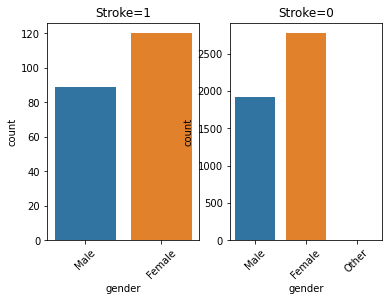

In [6]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="gender", data=df[df["stroke"]==1])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="gender", data=df[df["stroke"]==0])
plt.xticks(rotation=45)

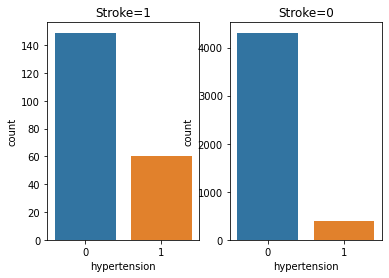

In [7]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="hypertension", data=df[df["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="hypertension", data=df[df["stroke"]==0])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

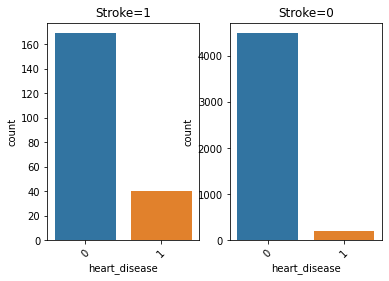

In [8]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="heart_disease", data=df[df["stroke"]==1])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="heart_disease", data=df[df["stroke"]==0])
plt.xticks(rotation=45)

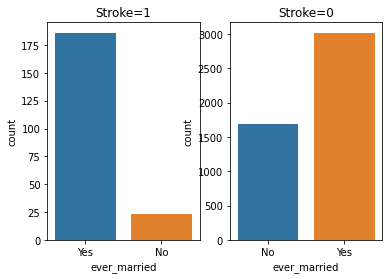

In [9]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="ever_married", data=df[df["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="ever_married", data=df[df["stroke"]==0])


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'children'),
  Text(1, 0, 'Private'),
  Text(2, 0, 'Never_worked'),
  Text(3, 0, 'Self-employed'),
  Text(4, 0, 'Govt_job')])

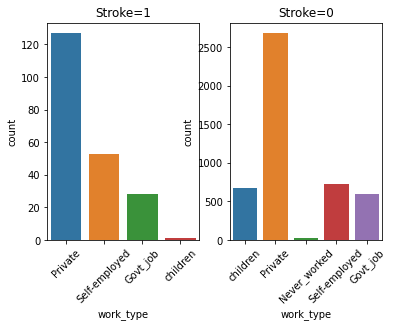

In [10]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="work_type", data=df[df["stroke"]==1])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="work_type", data=df[df["stroke"]==0])
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

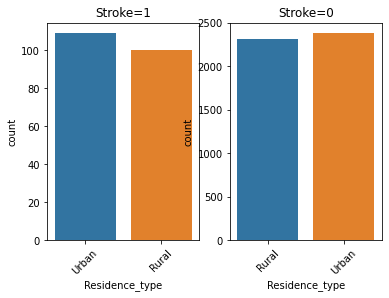

In [11]:
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="Residence_type", data=df[df["stroke"]==1])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="Residence_type", data=df[df["stroke"]==0])
plt.xticks(rotation=45)

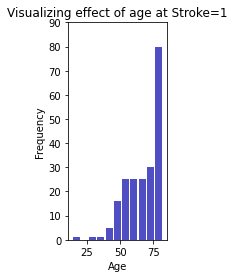

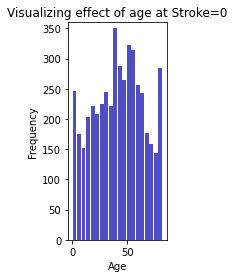

In [12]:
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=df[df["stroke"]==1]["age"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualizing effect of age at Stroke=1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=df[df["stroke"]==0]["age"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualizing effect of age at Stroke=0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

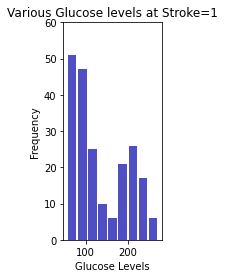

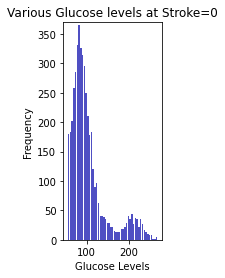

In [13]:
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=df[df["stroke"]==1]["avg_glucose_level"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.title('Various Glucose levels at Stroke=1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=df[df["stroke"]==0]["avg_glucose_level"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.title('Various Glucose levels at Stroke=0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

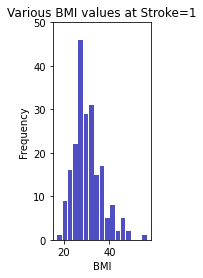

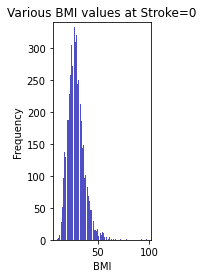

In [14]:
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=df[df["stroke"]==1]["bmi"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Various BMI values at Stroke=1')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=df[df["stroke"]==0]["bmi"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Various BMI values at Stroke=0')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [15]:
df_final=df
df_final=df_final.drop(['gender','smoking_status','work_type','Residence_type','ever_married'],axis=1)
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [16]:
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [17]:
gender = pd.get_dummies(df['gender'], prefix='gender')
smoking_status = pd.get_dummies(df['smoking_status'], prefix='smoking_status')
work_type = pd.get_dummies(df['work_type'], prefix='work_type')
Residence_type = pd.get_dummies(df['Residence_type'], prefix='Residence_type')
ever_married = pd.get_dummies(df['ever_married'], prefix='ever_married')
df_final = pd.merge(df_final, gender, left_index=True, right_index=True)
df_final = pd.merge(df_final, work_type, left_index=True, right_index=True)
df_final = pd.merge(df_final, smoking_status, left_index=True, right_index=True)
df_final = pd.merge(df_final, Residence_type, left_index=True, right_index=True)
df_final = pd.merge(df_final, ever_married, left_index=True, right_index=True)
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,...,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [18]:
stroke1=list(df['stroke'])
count=0
for i in range(len(stroke1)):
    if count>211:
        if stroke1[i]==0:
            stroke1[i]=2
    if stroke1[i]==0:
        count+=1
df_final=df_final.drop(['stroke'],axis=1)
df_final['stroke']=stroke1
df_final= df_final[df_final['stroke'] != 2]
y_train=np.array(list(df_final['stroke']))
df_final=df_final.drop(['stroke'],axis=1)

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [20]:
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.6,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5,81.0,0,0,186.21,29.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,11.0,0,0,87.51,24.4,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
460,7.0,0,0,72.35,17.0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
461,16.0,0,0,113.47,19.5,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
462,44.0,0,0,103.78,49.8,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [21]:
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes
0,67.0,0,1,228.69,36.6,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,49.0,0,0,171.23,34.4,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
5,81.0,0,0,186.21,29.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,11.0,0,0,87.51,24.4,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
460,7.0,0,0,72.35,17.0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
461,16.0,0,0,113.47,19.5,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
462,44.0,0,0,103.78,49.8,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [22]:
columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'Residence_type_Rural', 'Residence_type_Urban', 'ever_married_No',
       'ever_married_Yes']
logreg.fit(df_final[columns],y_train)
y_test=logreg.predict(df_final[columns])
count=0
for i in range(len(y_test)):
    if y_test[i]==y_train[i]:
        count+=1
print(count*100/len(y_train))

75.29691211401425


In [23]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_train, y_test)
res

array([[153,  59],
       [ 45, 164]], dtype=int64)

In [24]:
TN=res[1][1]
TP=res[0][0]
FN=res[1][0]
FP=res[0][1]
print(TP,FP,FN,TN)

153 59 45 164


In [25]:
Sensitivity=(TP)/(TP+FN)
Specificity=(TN)/(TN+FP)
Precision=(TP)/(TP+FP)
Recall=(TP)/(TP+FN)
f1=2*(Precision*Recall)/(Precision+Recall)

In [26]:
print('Sensitivity: '+str(Sensitivity))
print('Specificity: '+str(Specificity))
print('Precision: '+str(Precision))
print('Recall: '+str(Recall))
print('f1: '+str(f1))

Sensitivity: 0.7727272727272727
Specificity: 0.7354260089686099
Precision: 0.7216981132075472
Recall: 0.7727272727272727
f1: 0.7463414634146343
